<a href="https://colab.research.google.com/github/jeambeam2010-ui/the-presentation-of-geometric-figures-on-a-cardboard/blob/main/%D0%9A%D0%BE%D0%BC%D0%BF%D1%8C%D1%8E%D1%82%D0%B5%D1%80%D0%BD%D0%BE%D0%B5_%D0%B7%D1%80%D0%B5%D0%BD%D0%B8%D0%B5ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Библиотека GITHUB

Библиотека

In [ ]:
import cv2
import matplotlib

from matplotlib import pyplot as plt

In [ ]:
import numpy as np

In [ ]:
matplotlib.rcParams['figure.figsize'] = (20, 10)

In [ ]:
image = cv2.imread('/content/sample_data/компзрение2.jpg')

In [ ]:
print(image.shape)


(4032, 3024, 3)


In [ ]:
image = cv2.resize(image, (480, 640))

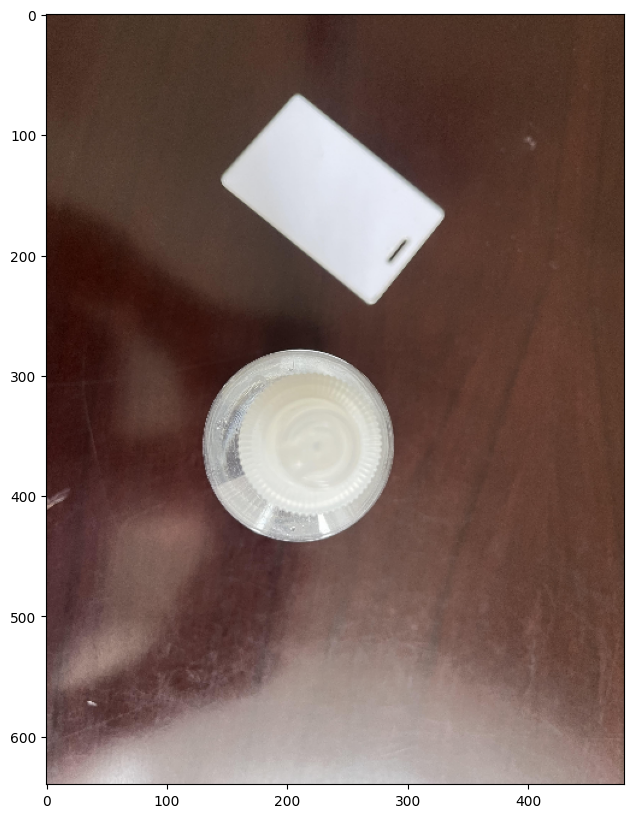

In [ ]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

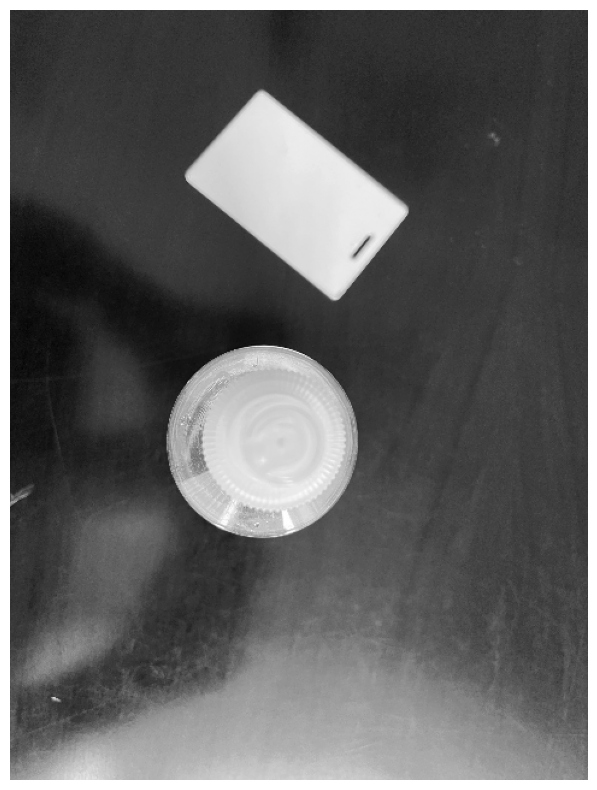

In [ ]:
# Переводим в ч/б
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.imshow(gray, cmap='gray')
plt.axis('off')
plt.show()

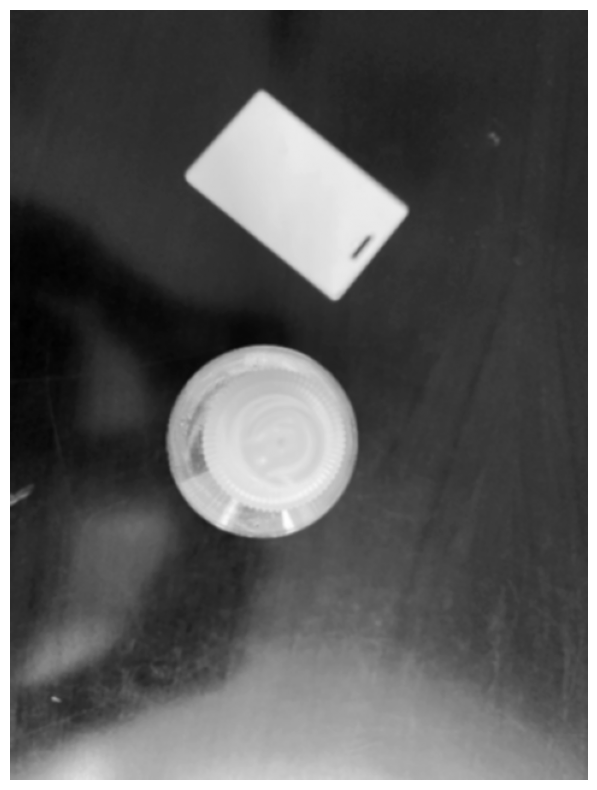

In [ ]:
gray_blurred = cv2.GaussianBlur(gray, (5, 5), 0)

plt.imshow(gray_blurred, cmap='gray')
plt.axis('off')
plt.show()

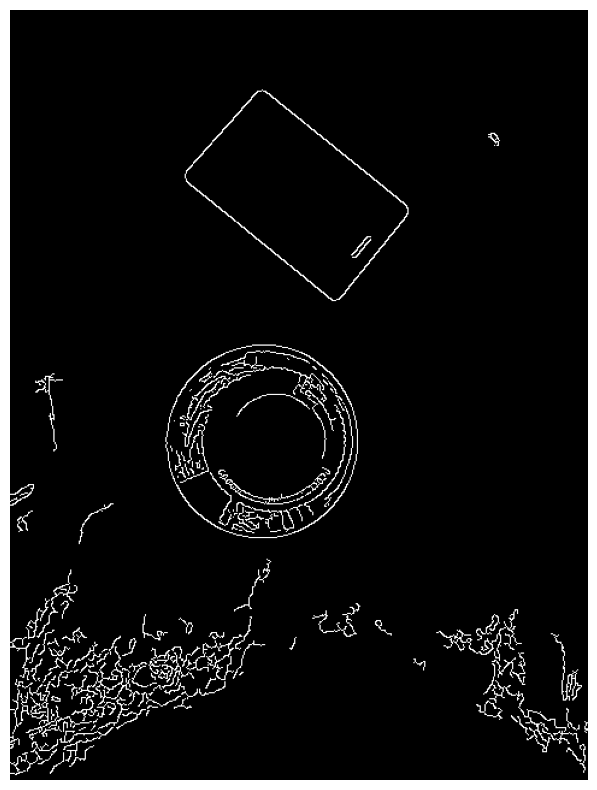

In [ ]:
edged = cv2.Canny(gray_blurred, 10, 50)
plt.imshow(edged, cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
# находим контуры

cnts = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[0]
cnts[1]

array([[[ 12, 617]],

       [[ 11, 618]],

       [[ 10, 618]],

       [[ 12, 618]],

       [[ 13, 619]],

       [[ 13, 622]],

       [[ 12, 623]],

       [[ 10, 623]],

       [[  9, 622]],

       [[  9, 621]],

       [[  8, 620]],

       [[  7, 620]],

       [[  6, 621]],

       [[  6, 625]],

       [[  4, 627]],

       [[  3, 627]],

       [[  2, 626]],

       [[  3, 625]],

       [[  2, 626]],

       [[  1, 626]],

       [[  0, 625]],

       [[  1, 626]],

       [[  2, 626]],

       [[  5, 629]],

       [[  5, 630]],

       [[  6, 631]],

       [[  6, 632]],

       [[  7, 633]],

       [[  6, 634]],

       [[  5, 634]],

       [[  4, 635]],

       [[  3, 634]],

       [[  0, 634]],

       [[  3, 634]],

       [[  4, 635]],

       [[  5, 635]],

       [[  6, 634]],

       [[  7, 634]],

       [[  8, 633]],

       [[ 10, 633]],

       [[ 11, 632]],

       [[ 12, 632]],

       [[ 11, 632]],

       [[ 10, 633]],

       [[  7, 633]],

       [[ 

In [ ]:
# Теперь мы хотим найти такие контуры, что приближаются черетыхугольником

cnts = sorted(cnts,
              key = cv2.contourArea, # функция-компоратор
              reverse = True)

solution = None
for c in cnts:
    # считаем пермиметр чтобы задать погрешность
    peri = cv2.arcLength(c, True)
    # считаем аппроксимацию
    approx = cv2.approxPolyDP(c, 0.02 * peri, True)
    if len(approx) == 4:
        solution = approx
        break

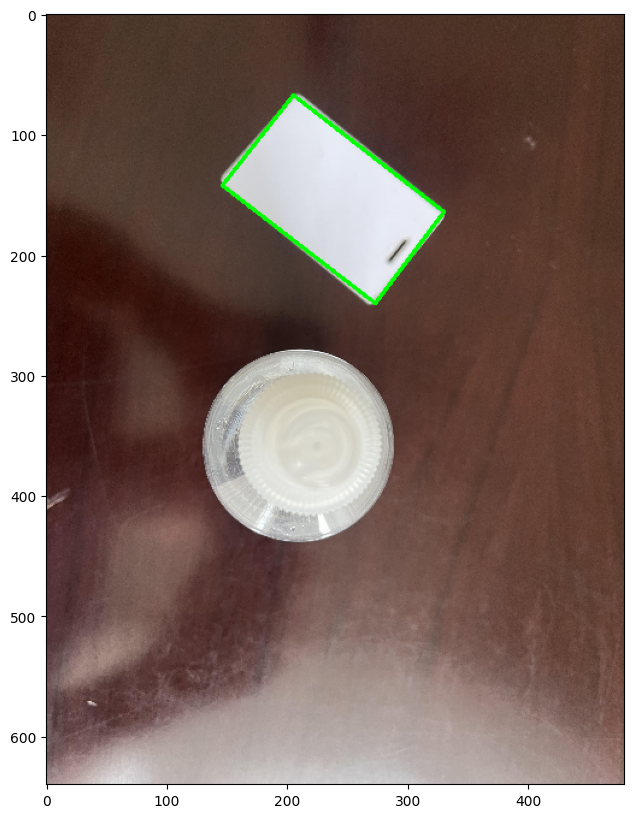

In [ ]:
image_to_draw = image.copy()
cv2.drawContours(image_to_draw, [solution], -1, (0, 255, 0), 2)
plt.imshow(cv2.cvtColor(image_to_draw, cv2.COLOR_BGR2RGB))

In [ ]:
solution = None
for c in cnts:

    (x, y), radius = cv2.minEnclosingCircle(c)
    circle_area = np.pi * (radius ** 2)
    contour_area = cv2.contourArea(c)

    if contour_area / circle_area > 0.8:
        solution = c
        break

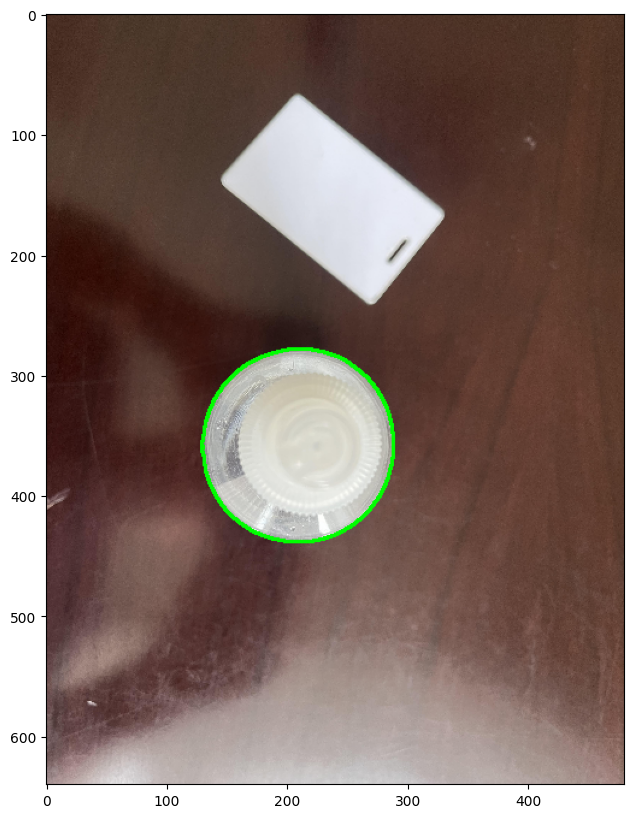

In [ ]:
image_to_draw = image.copy()
cv2.drawContours(image_to_draw, [solution], -1, (0, 255, 0), 2)
plt.imshow(cv2.cvtColor(image_to_draw, cv2.COLOR_BGR2RGB))